In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('OneDrive\Documents\my_datasets\imports-85.data', names=cols)

cars.shape

(205, 26)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars_num = cars[numeric_cols]

In [5]:
cars_num = cars_num.replace('?', np.nan)
cars_num.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500


In [6]:
cars_num = cars_num.astype(float)
cars_num.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
cars_num['price'].dropna(inplace=True)
cars_num.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
cars_num.fillna(cars_num.mean(), inplace=True)
cars_num.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
price_col = cars_num['price']
cars_num = (cars_num - cars_num.min())/(cars_num.max()-cars_num.min())
cars_num['price'] = price_col

In [10]:
cars_num.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0


## Modèle univarié

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(training_cols, target_cols, df):
    np.random.seed(1)
    dfsuffled = df.loc[np.random.permutation(df.index)]
    training_set = dfsuffled[:int(len(cars_num)/2)]
    test_set = dfsuffled[int(len(cars_num)/2):]
    knn = KNeighborsRegressor()
    knn.fit(training_set[[training_cols]], training_set[target_cols])
    predictions = knn.predict(test_set[[training_cols]])
    mse = mean_squared_error(test_set[target_cols], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [12]:
rmse_results = {}
train_cols = cars_num.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars_num)
    rmse_results[col] = rmse_val

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          4244.103421
highway-mpg          4245.734567
curb-weight          4436.523561
width                5030.139338
city-mpg             5085.047194
horsepower           5092.272401
length               5418.778301
wheel-base           5743.877086
bore                 6746.031651
compression-rate     7177.202061
normalized-losses    7374.513274
height               7832.152833
peak-rpm             7965.541705
stroke               8096.653898
dtype: float64

In [13]:
def knn_train_test_k(training_cols, target_cols, df):
    np.random.seed(1)
    dfsuffled = df.loc[np.random.permutation(df.index)]
    training_set = dfsuffled[:int(len(cars_num)/2)]
    test_set = dfsuffled[int(len(cars_num)/2):]
    train_neighbors = [1, 3, 5, 7, 9]
    rmses = {}
    for k in train_neighbors:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(training_set[[training_cols]], training_set[target_cols])
        predictions = knn.predict(test_set[[training_cols]])
        mse = mean_squared_error(test_set[target_cols], predictions)
        rmse = np.sqrt(mse)
        rmses[k] = rmse
    return rmses

In [14]:
rmses_results = {}
train_cols = cars_num.columns.drop('price')
for col in train_cols:
    rmses_val = knn_train_test_k(col, 'price', cars_num)
    rmses_results[col] = rmses_val

rmses_results

{'normalized-losses': {1: 6998.7424709166335,
  3: 7038.210876329459,
  5: 7374.513274367573,
  7: 7722.670399388631,
  9: 7507.512182575815},
 'wheel-base': {1: 5400.51418967299,
  3: 5629.538534558065,
  5: 5743.8770860517825,
  7: 6048.744597831812,
  9: 6360.529322830884},
 'length': {1: 6853.715819594109,
  3: 5113.209767682691,
  5: 5418.778300690459,
  7: 5618.149068803402,
  9: 5641.426309574451},
 'width': {1: 5739.245757378005,
  3: 5291.949721784998,
  5: 5030.139338284197,
  7: 4933.6396353832,
  9: 4951.829909070571},
 'height': {1: 10653.050778292903,
  3: 8176.934988463841,
  5: 7832.152832500197,
  7: 7743.870132519971,
  9: 7632.665665042622},
 'curb-weight': {1: 5842.169653813219,
  3: 4527.849193303364,
  5: 4436.523561278551,
  7: 4320.057970537657,
  9: 4181.086220663609},
 'engine-size': {1: 4775.980594973188,
  3: 4211.354845313718,
  5: 4244.103420588581,
  7: 4028.227456215567,
  9: 4125.116174076774},
 'bore': {1: 7930.548590614734,
  3: 6353.8909942494565,
  

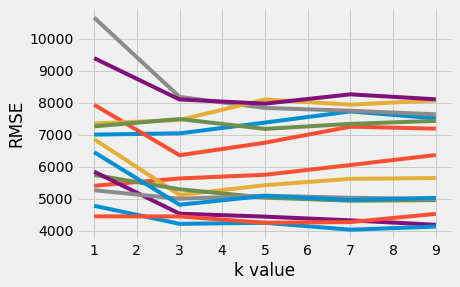

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

for k,v in rmses_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.xticks([1,2,3,4,5,6,7,8,9])


## Modèle multivarié

In [16]:
feature_avg_rmse = {}
for k,v in rmses_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          4276.956498
highway-mpg          4384.386989
curb-weight          4661.537320
horsepower           5072.792482
width                5189.360872
city-mpg             5264.737474
length               5729.055853
wheel-base           5836.640746
bore                 7092.318813
normalized-losses    7328.329841
compression-rate     7335.788011
stroke               7779.820219
peak-rpm             8361.301724
height               8407.734879
dtype: float64


In [17]:
def knn_train_test_list(training_cols, target_cols, df):
    np.random.seed(1)
    dfsuffled = df.loc[np.random.permutation(df.index)]
    training_set = dfsuffled[:int(len(cars_num)/2)]
    test_set = dfsuffled[int(len(cars_num)/2):]
    knn = KNeighborsRegressor()
    knn.fit(training_set[training_cols], training_set[target_cols])
    predictions = knn.predict(test_set[training_cols])
    mse = mean_squared_error(test_set[target_cols], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [18]:
rmses_list_results = {}

for nr_best_feats in range(2,7):
    rmses_list_results['{} best features'.format(nr_best_feats)] = knn_train_test_list(
        sorted_features[:nr_best_feats],
        'price',
        cars_num
    )

rmses_list_results

{'2 best features': 3412.89673930856,
 '3 best features': 3570.502548686472,
 '4 best features': 3899.4382458155237,
 '5 best features': 3801.3178593298467,
 '6 best features': 3773.2372117657646}

## Réglage des hyperparamètres

In [19]:
def knn_train_test_k25(training_cols, target_cols, df):
    np.random.seed(1)
    dfsuffled = df.loc[np.random.permutation(df.index)]
    training_set = dfsuffled[:int(len(cars_num)/2)]
    test_set = dfsuffled[int(len(cars_num)/2):]
    train_neighbors = [i for i in range(1, 25)]
    rmses = {}
    for k in train_neighbors:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(training_set[training_cols], training_set[target_cols])
        predictions = knn.predict(test_set[training_cols])
        mse = mean_squared_error(test_set[target_cols], predictions)
        rmse = np.sqrt(mse)
        rmses[k] = rmse
    return rmses

In [20]:
k_rmses_results = {}

for nr_best_feats in range(2,6):
    k_rmses_results['{} best features'.format(nr_best_feats)] = knn_train_test_k25(
        sorted_features[:nr_best_feats],
        'price',
        cars_num
    )

k_rmses_results

{'2 best features': {1: 4022.8740864942806,
  2: 3680.3404469950538,
  3: 3515.039976496706,
  4: 3519.438236926101,
  5: 3412.89673930856,
  6: 3519.8030683714037,
  7: 3724.0460620414588,
  8: 3834.0585776937673,
  9: 3795.6406568326815,
  10: 3860.952972566357,
  11: 4093.551524283771,
  12: 4163.573406673935,
  13: 4255.027374020241,
  14: 4210.215815095833,
  15: 4256.70492810227,
  16: 4386.216597807453,
  17: 4503.471179969052,
  18: 4621.849505979088,
  19: 4667.894753179334,
  20: 4715.040360341434,
  21: 4711.269545595229,
  22: 4772.074216981012,
  23: 4845.610129236966,
  24: 4887.9659784971545},
 '3 best features': {1: 4143.620686482709,
  2: 3637.594322286803,
  3: 3631.195257688884,
  4: 3852.5440279254526,
  5: 3570.502548686472,
  6: 3632.45246417794,
  7: 3776.2483778694977,
  8: 3863.3357087179375,
  9: 3998.9672092179576,
  10: 4096.564137613107,
  11: 4185.617526806375,
  12: 4154.7511989984105,
  13: 4311.256524718049,
  14: 4445.0417403618685,
  15: 4561.23032351

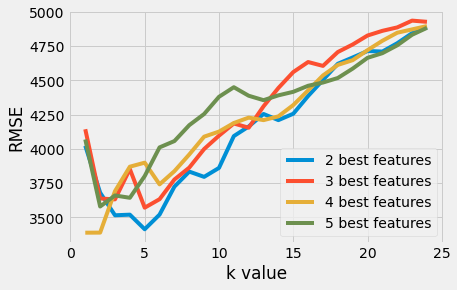

In [21]:
for k,v in k_rmses_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()